<font color='black'><font size="4">Notebook nettoyage des données -- Le plan de ce notebook Projet 3 est le suivant:</font></font>
<font color='black'><font size="3"> <ul>
<li>Lire le fichier csv et le présenter sous forme du DataFrame </li>
<li>Nettoyer le DataFrame des valeurs aberrantes</li>
<li>Présentation de l'idée d'application</li>
<li>Filtrer le DataFrame en gardant les variables pertinentes qui sert à atteindre l'idée proposé</li> 
<li>Choisir les variables les plus importants et les nettoyer des valeurs Nan</li>
<li>Eliminer les données duplicants sous 2 manières </li>
<li>Modifier la visualisation de certains colonnes (countries & main_category) </li>
<li>Traiter les valeurs manquants</li>
   <li>Visualisez la corrélation entre les différentes variables</li>
</ul>   </font></font>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as pl
#import sys
#!{sys.executable} -m pip install pycountry
import pycountry

## A) Lire le fichier csv et le présenter sous forme du DataFrame

In [ ]:
df_data = pd.read_csv('en.openfoodfacts.org.products.csv',sep='\t',error_bad_lines=True, warn_bad_lines=False)

In [4]:
df_data

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637558,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637559,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637560,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637561,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## B) Nettoyer le DataFrame des valeurs aberrantes

<font color='darkblue'><font size="3">
Nous allons faire une analyse sur les variables numériques qui sont de la colonne 77 à 184.
Les "nutriscore-score" qui sont présentés sous forme de chiffres, ils sont donc éliminés dans ce test. </font></font>

In [47]:
df_data_filter = df_data.iloc[:, 77:184]
df_data_drop = df_data_filter.drop(columns=['nutrition-score-fr_100g','nutrition-score-uk_100g'])

<font color='darkblue'><font size="3">
1) La somme des informations nutritionnelles ne doit pas dépasser le 100g puisque les valeurs ont été récupérées sur 100g.
<br>2) De plus, chacune de ces valeurs ne doit pas être inférieure à zéro ou supérieure à 100.
<br>Chacun de ces deux points a été fait individuellement et ensuite nous récupérons les index et les supprimons à la fin de cette partie.</font></font>

In [5]:
## 1) La somme des informations nutritionnelles ne doit pas dépasser le 100g puisque les valeurs ont été récupérées sur 100g
df_product_filter = df_data_drop

df_sum = df_product_filter.fillna(0)
df_data["sum"] = df_sum.sum(axis=1)
liste_of_sum = df_data[df_data["sum"]>100].index.values ## liste des index a supprimer

df_data_clean_product = df_data.drop(columns=["sum"])

In [6]:
## 2) De plus, chacune de ces valeurs ne doit pas être inférieure à zéro ou supérieure à 100.
df_product_filter = df_data_drop
liste_to_del = np.array([])

for col in df_product_filter.columns: ## liste des index a supprimer
     liste_to_del = np.append(liste_to_del, df_product_filter[ (df_product_filter[col]<0.0) | (df_product_filter[col]>100.0) ].index)

In [7]:
## supprimons les index récupérer en 1) et 2)
total_liste = np.concatenate((liste_of_sum, liste_to_del))
df_data_final = df_data_clean_product.drop(index=total_liste)

<font color='darkblue'><font size="3">Le DataFrame après le nettoyage des valeurs aberrantes sera le suivant:</font></font>

In [8]:
df_data_final 

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637558,9999999910128,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1572513866,2019-10-31T09:24:26Z,1572513866,2019-10-31T09:24:26Z,Sandwich club Rillette poisson combava,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637559,999999999,http://world-en.openfoodfacts.org/product/9999...,nutrinet-sante,1608105503,2020-12-16T07:58:23Z,1608105504,2020-12-16T07:58:24Z,Thé noir BIO Darjeeling,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637560,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,Fati,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637561,9999999999994,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1613129728,2021-02-12T11:35:28Z,1613129730,2021-02-12T11:35:30Z,Light & Free SKYR A BOIRE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## C) Présentation de l'idée d'application

<font color='darkblue'><font size="3">**Une petite introduction :**
    
Récemment, de plus en plus de personnes se dirigent vers le régime végétarien, en particulier le régime végétalien ( Voir les liens ci-dessous).
Dans cette étude, nous allons donc présenter une idée d'application qui peut faciliter l'accès à la nourriture végétalienne et qui liste les ingrédients de chaque produit (nous détaillerons ce processus dans le prochain Notebook). 
    
**Donc l'idée que je propose :** est de faire une étude sur les aliments qui sont végétaliens (qui ne contiennent pas de poulet / viande, poisson, produits laitiers). De plus, nous cherchons des aliments qui contiennent des vitamines que l'on trouve dans la viande / le poisson / les produits laitiers.</font></font>

<font size="2.5"><ins>Lien à consulter:</ins>
<br><a> https://www.capital.fr/economie-politique/le-marche-vegetarien-et-vegan-a-augmente-de-24-en-2018-selon-un-etude-1322408 : Nombre de personnes se mettant au régime végétalien en France </a>
<br><a> https://www.cnews.fr/conso/2021-01-22/regimes-vegan-vegetarien-vegetalien-pescetarien-quelles-differences-764768 : Différence entre les différents types de régime végétalien, vegan, végétarien</a>
</font></font>

## D) Filtrer le DataFrame en gardant les variables pertinentes qui sert à atteindre l'idée proposé

In [9]:
df_filter = df_data_final.filter(items = ["product_name","main_category","origins","countries","brands","quantity","ingredients_that_may_be_from_palm_oil_n","nutriscore_score", "nova_group", 'nutrition-score-fr_100g', "collagen-meat-protein-ratio_100g","carbon-footprint-from-meat-or-fish_100g","-lactose_100g","vitamin-b12_100g","vitamin-b6_100g","omega-3-fat_100g","vitamin-d_100g","calcium_100g","iron_100g","zinc_100g"])

<font color='darkblue'>Expliquer le choix de la sélection de ces variables:
<font color='darkblue'><br>**ingredients_that_may_be_from_palm_oil_n:**</font></font> <font color='black'>réputée mauvaise pour la santé en raison de son fort taux d'acides gras saturés, qui augmentent le mauvais cholestérol</font></font>
<font color='darkblue'><br>**nutriscore_score:**</font></font> <font color='black'> implique la qualité nutritionnelle des produits sous une forme simplifiée et complémentaire à la déclaration nutritionnelle obligatoire (fixée par la réglementation européenne) </font></font>
<font color='darkblue'><br>**nova_group:**</font></font> attribue un groupe aux produits alimentaires en fonction du degré de transformation qu'ils ont subi<font color='black'> </font></font>
<font color='darkblue'><br>**collagen-meat-protein-ratio_100g:** </font></font> <font color='black'>implique la présence du viande dans le produit</font></font>
<font color='darkblue'><br>**carbon-footprint-from-meat-or-fish_100g:** </font></font> <font color='black'>implique la présence du viande ou/et poisson dans le produit</font></font>
<font color='darkblue'><br>**-lactose_100g:** </font></font> <font color='black'>implique la présence des produit laitier</font></font>
<font color='darkblue'><br>**vitamin-b12_100g:** </font></font> <font color='black'>un vitamin qui existe dans la viande du boeuf</font></font>
<font color='darkblue'><br>**vitamin-b6_100g:** </font></font> <font color='black'>un vitamin qui existe dans la viande du poulet</font></font>
<font color='darkblue'><br>**omega-3-fat_100g:** </font></font> <font color='black'>un vitamin qui exist dans les poissons</font></font>
<font color='darkblue'><br>**vitamin-d_100g:** </font></font> <font color='black'>un vitamin très utile au diet vegan</font></font>
<font color='darkblue'><br>**calcium_100g:** </font></font> <font color='black'>un vitamin utile au diet vegan</font></font>
<font color='darkblue'><br>**iron_100g:** </font></font> <font color='black'>un vitamin utile au dier vegan</font></font>
<font color='darkblue'><br>**zinc_100g:** </font></font> <font color='black'>un vitamin utile au diet vegan</font></font>   <font size="3"></font></font>


In [49]:
df_filter

,product_name,main_category,origins,countries,brands,quantity,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
1,Cacao,NaN,NaN,France,NaN,130 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Filetes de pollo empanado,NaN,NaN,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,moutarde au moût de raisin,en:mustards,NaN,France,courte paille,100g,0.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sfiudwx,fr:xsf,NaN,en:France,Watt,dgesc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Sauce Sweety chili 0%,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637558,Sandwich club Rillette poisson combava,NaN,NaN,en:re,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637559,Thé noir BIO Darjeeling,NaN,NaN,en:france,Pagès,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637560,Fati,NaN,NaN,en:be,NaN,440 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637561,Light & Free SKYR A BOIRE,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## E) Choisir les variables les plus importants et les nettoyer des valeurs Nan

<font color='darkblue'><font size="3">Nous supprimons les cas où nous avons Nan dans product_name, main_category</font></font>

In [59]:
df = df_filter.dropna(subset=["product_name","main_category","countries"]) 
## origins where the prduct is made, countries where the product is sold 

In [60]:
df

,product_name,main_category,origins,countries,brands,quantity,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
3,moutarde au moût de raisin,en:mustards,NaN,France,courte paille,100g,0.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sfiudwx,fr:xsf,NaN,en:France,Watt,dgesc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Pate d'amende,fr:pate-d-amende,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Salade de carottes râpées,en:seasoned-shredded-carrots,NaN,France,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Tarte noix de coco,en:coconut-pies,NaN,France,"Crous Resto',Crous",NaN,NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637552,Minis beignets,en:sweet-fritters,NaN,France,NaN,NaN,NaN,15.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637554,Erdbeerkuchen 1019g tiefgefroren,de:tiefkühl-kuchen,NaN,Deutschland,Coppenrath & Wiese,"1,019 kg",0.0,12.0,4.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637555,Steak haché pur boeuf,en:ground-beef-steaks,NaN,France,NaN,NaN,NaN,-2.0,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637556,Marrons glacés,en:marrons-glaces,NaN,en:be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## F) Eliminer les données duplicants sous 2 manières
### F-1) La manière drop duplicates

In [61]:
### pour supprimer les duplicants:
df_clean = df.drop_duplicates()

In [62]:
df_clean.shape

(533081, 20)

### F-2) Produits avec le même "nom_produit" de la même quantité et fabriqués par la même marque

<font color='darkblue'><font size="3">Dans la partie suivante, nous recherchons les produits qui sont les mêmes dans le df. Si nous avons le même nom de produit, la même quantité et la même marque, donc c'est le même produit, les index des doublons sont récupérés pour être éliminés du df_filter.</font></font>

In [63]:
liste_index = np.array([])
## creation du df_clea_filter qui ne contient pas les valeurs Nan
df_clean_filter = df_clean.dropna(subset=['product_name', 'quantity','brands'])
## df qui contient les duplicants:
df_clean_filter = df_clean_filter[df_clean_filter.duplicated(['product_name', 'quantity','brands'],keep=False)]
liste_duplicated_product_name = df_clean_filter["product_name"].unique()
liste_duplicated_product_name = np.delete(liste_duplicated_product_name, np.where(np.nan)) ## delete les valeurs Nan
for i in range(len(liste_duplicated_product_name)):
    df_echantillon = df_clean_filter[df_clean_filter["product_name"]==liste_duplicated_product_name[i]]
    idx1 = df_echantillon.index ## all index
    idx2 = df_echantillon.loc[:,"ingredients_that_may_be_from_palm_oil_n":"zinc_100g"].drop_duplicates().index ##index of the rest after delete the duplicants
    liste_index = np.append(liste_index,idx1.difference(idx2)) ## recuperer les index qui sont a eliminer du df_clean
    
df_clean_drop = df_clean.drop(index = liste_index)  
df_clean_drop = df_clean_drop.drop(columns=["quantity"])

In [64]:
df_clean_drop   

,product_name,main_category,origins,countries,brands,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
3,moutarde au moût de raisin,en:mustards,NaN,France,courte paille,0.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sfiudwx,fr:xsf,NaN,en:France,Watt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Pate d'amende,fr:pate-d-amende,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Salade de carottes râpées,en:seasoned-shredded-carrots,NaN,France,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Tarte noix de coco,en:coconut-pies,NaN,France,"Crous Resto',Crous",NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637552,Minis beignets,en:sweet-fritters,NaN,France,NaN,NaN,15.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637554,Erdbeerkuchen 1019g tiefgefroren,de:tiefkühl-kuchen,NaN,Deutschland,Coppenrath & Wiese,0.0,12.0,4.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637555,Steak haché pur boeuf,en:ground-beef-steaks,NaN,France,NaN,NaN,-2.0,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637556,Marrons glacés,en:marrons-glaces,NaN,en:be,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## G) Modifier la visualisation de certains colonnes (countries & main_category)

<font color='darkblue'><font size="3">Nous remarquons que les colonnes "main_category" et "countries" ne sont pas une seule chaîne. La fonction split divise donc les chaînes en deux (si elles sont séparées par " :").</font></font>

In [65]:
def split(df,kwargs):
    if df[kwargs].count(':') != 1:
        return df[kwargs]
    src, text = df[kwargs].split(':')
    if len(text)==0:
        return src
    #translated = translator.translate(text, src=src, dest='fr')
    else:
        return text

df_clean_drop["main_category"] = df_clean_drop.apply(split,kwargs="main_category",axis=1)
df_clean_drop["countries"] = df_clean_drop.apply(split,kwargs="countries",axis=1)

<font color='darkblue'><font size="3">Dans la colonne "countries", nous trouvons différentes formes du nom des pays. La fonction **country_name** nous donne donc la même forme de nom de pays.</font></font>

In [66]:
list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]   

def country_name(df):
    if (len(df['countries'])==2 and df['countries'].upper() in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['countries']).name
    elif (len(df['countries'])==3 and df['countries'].upper() in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['countries']).name
    else:
        return df['countries'].capitalize()


df_clean_drop['countries'] = df_clean_drop.apply(country_name, axis = 1)

In [67]:
df_clean_drop

,product_name,main_category,origins,countries,brands,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
3,moutarde au moût de raisin,mustards,NaN,France,courte paille,0.0,18.0,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sfiudwx,xsf,NaN,France,Watt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Pate d'amende,pate-d-amende,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Salade de carottes râpées,seasoned-shredded-carrots,NaN,France,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Tarte noix de coco,coconut-pies,NaN,France,"Crous Resto',Crous",NaN,14.0,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637552,Minis beignets,sweet-fritters,NaN,France,NaN,NaN,15.0,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637554,Erdbeerkuchen 1019g tiefgefroren,tiefkühl-kuchen,NaN,Deutschland,Coppenrath & Wiese,0.0,12.0,4.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637555,Steak haché pur boeuf,ground-beef-steaks,NaN,France,NaN,NaN,-2.0,NaN,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1637556,Marrons glacés,marrons-glaces,NaN,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_clean_drop = df_clean_drop.drop(index=4) ## drop manuel

## H) Traiter les valeurs manquants

<font color='darkblue'><font size="3">Pour traiter les valeurs manquantes, nous allons d'abord les regrouper par catégorie, puis nous sélectionnons les colonnes où nous devrons avoir des valeurs numériques donc ("ingredients_that_may_be_from_palm_oil_n" jusqu'à "zinc_100g"). <br>Ainsi, dans le cas où nous n'avons qu'un seul produit, nous gardons les valeurs Nan car il peut s'agir d'un manque de données et non de valeurs nulles.
<br>Dans le cas de deux produits ou plus, on remplace les valeurs Nan par la moyenne des valeurs de la même colonne</font></font>


In [80]:
liste_category = df_clean_drop["main_category"].unique()
df_val_categoriser = pd.DataFrame()
#dataset = df_clean_drop1
for item in liste_category:
    df_val_manq = df_clean_drop[df_clean_drop["main_category"]==item]
    df1 = df_val_manq.loc[:,"product_name":"brands"]
    if df_val_manq.shape[0] == 1:
        df2 = df_val_manq.loc[:,"ingredients_that_may_be_from_palm_oil_n":"zinc_100g"].fillna(np.nan)
        df_concat = df1.assign(**df2)
        df_val_categoriser = pd.concat([df_val_categoriser,df_concat]) 
    else:   
        df2 = df_val_manq.loc[:,"ingredients_that_may_be_from_palm_oil_n":"zinc_100g"].fillna(df_val_manq.loc[:,"ingredients_that_may_be_from_palm_oil_n":"zinc_100g"].mean())
        df_concat = df1.assign(**df2)
        df_val_categoriser = pd.concat([df_val_categoriser,df_concat])


In [81]:
df_final = df_val_categoriser.reset_index(drop=True)

In [82]:
df_final

,product_name,main_category,origins,countries,brands,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,nutrition-score-fr_100g,collagen-meat-protein-ratio_100g,carbon-footprint-from-meat-or-fish_100g,-lactose_100g,vitamin-b12_100g,vitamin-b6_100g,omega-3-fat_100g,vitamin-d_100g,calcium_100g,iron_100g,zinc_100g
0,moutarde au moût de raisin,mustards,NaN,France,courte paille,0.000000,18.000000,3.400316,18.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
1,Salsa de mostaza,mustards,NaN,España,"Prima,//Propiedad de://,Bolton Cile España S.A...",0.000000,11.470968,3.000000,11.470968,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
2,Hierba de trigo,mustards,NaN,France,NaN,0.008523,0.000000,3.400316,0.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
3,Yellow Mustard,mustards,NaN,United states,Heinz,0.000000,10.000000,3.000000,10.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
4,Moutarde Posh Dog,mustards,NaN,"France, royaume-uni",Marks & Spencer,0.008523,7.000000,3.400316,7.000000,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.009536,0.001814,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532493,"Mois 0,50 aluays",tiket,NaN,France,Aluays,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532494,J9V87-90013,11,NaN,Saudi arabia,hp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532495,cube mendiants,de-couverture,NaN,France,maison Gaucher,0.000000,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532496,raviolis pekinois surgelés,pekinois,Hongrie,France,asia food,0.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## I) Visualisez la corrélation entre les différentes variables

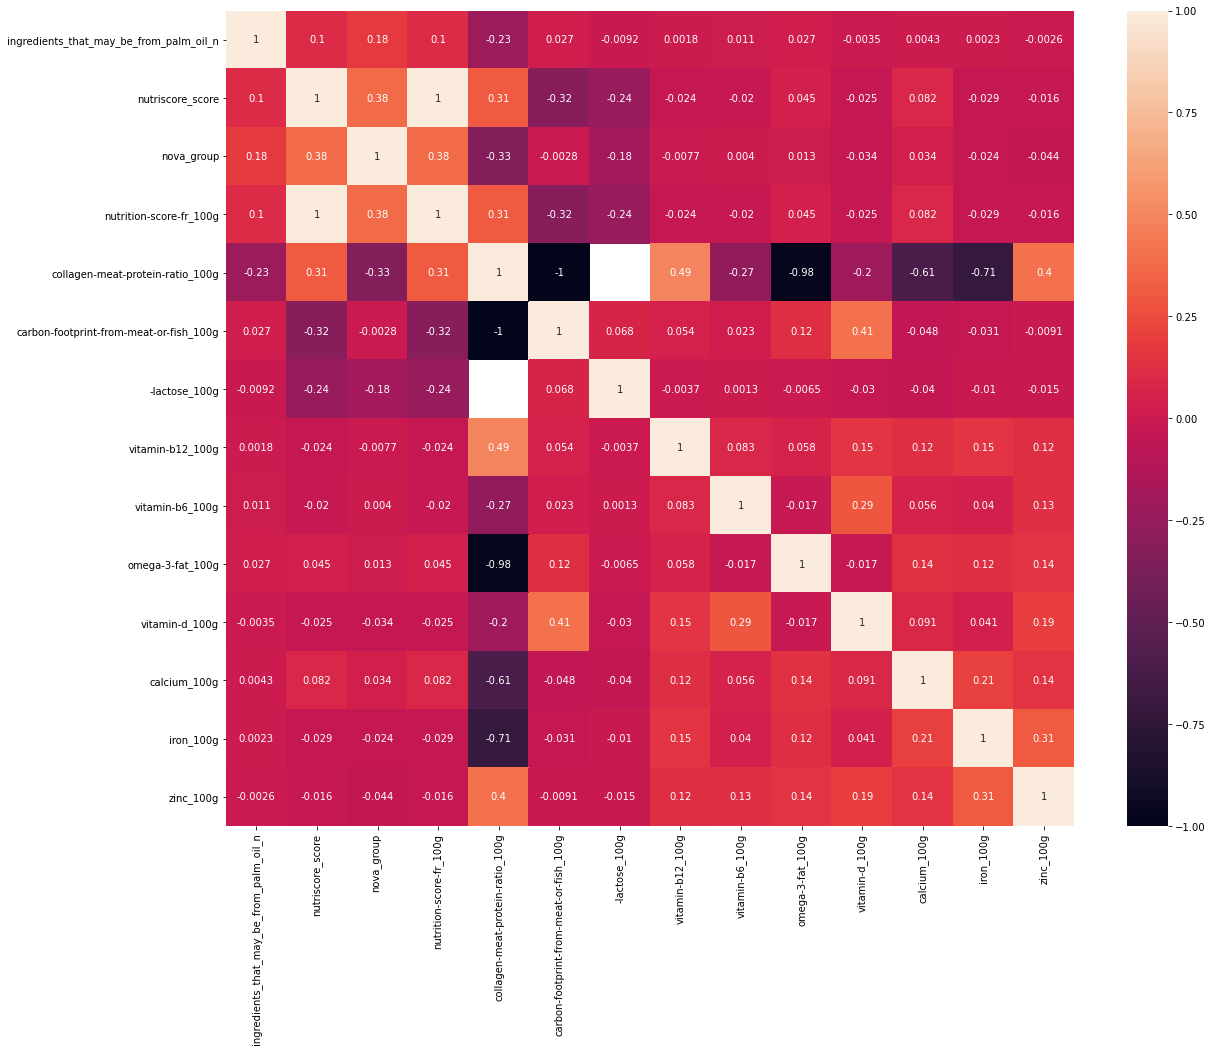

In [83]:
pl.figure(figsize=(19, 15))
corrMatrix = df_final.corr()
#corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
pl.show()

In [84]:
### save teh DataFrame to a csv folder
df_final.to_csv("normalise_df_Nan.csv",index=False)